# Figures

In [2]:
import os
import pathlib
import pickle

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

if 'project_dir' not in globals():
  project_dir = pathlib.Path.cwd().parent
os.chdir(project_dir)

data_file = 'data/3-process/data.pkl'
figure_file = 'reports/Fig'



## Figure 1

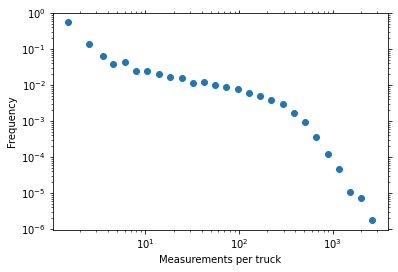

In [2]:
data = pd.read_pickle(data_file)
with matplotlib.rc_context({'xtick.top': True, 'ytick.right': True}):
    frequency_list = data['entity'].value_counts().values
    bins = np.logspace(
        start=np.log10(1), 
        stop=np.log10(max(frequency_list)), 
        num=30)
    counts, bins = np.histogram(frequency_list, bins=np.unique(np.round(bins)))
    counts = counts / sum(counts)
    pd.Series(counts, index=bins[:-1] + np.diff(bins)/2).plot(
        marker='o', ls='', loglog=True, xlabel='Measurements per truck', 
        ylabel='Frequency')

plt.savefig(figure_file + '1.pdf')

## Figure 2

In [1]:
data = pd.read_pickle(data_file)
time_difference = data.astype({'datetime': int}).groupby(['location', 'entity'])['datetime'].diff()
time_difference = time_difference.dropna() // 3600e9
distribution = time_difference.value_counts(sort=False).sort_index()

NameError: name 'pd' is not defined

In [ ]:
df = pd.Series(distribution)
df.index = df.index / 24
with matplotlib.rc_context({'xtick.top': True, 'ytick.right': True}):
    df.plot(xlim=(0,8), ylim=0, xlabel='Days', ylabel='Counts per hour')
    plt.gca().xaxis.set_minor_locator(MultipleLocator(1/24))
plt.savefig(figure_file + '2.pdf')